# Introdução 
Script criado para análise de curvas de luz do Sol com imagens geradas no site https://sdo.gsfc.nasa.gov/data/aiahmi/

### Passo a passo 
* 1 - Baixar as imagens zipadas do Sol no comprimento de onda desejado: https://sdo.gsfc.nasa.gov/data/aiahmi/
* 2 - Adicionar no scrip, o nome da pasta e caminho onde se localiza na sua máquina 
* 3 - Comparar curvas de luz desejadas. No caso do exemplo, estamos comparando curvas de luz de um dia com CME sem Flare e um dia sem CME e sem Flare

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
pip install opencv-python-headless


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
def calcular_curva_de_luz(pasta_imagens):
    imagens = sorted(glob.glob(f"{pasta_imagens}/*.jpg"))  # Lista todas as imagens na pasta
    curva_de_luz = []

    for img_path in imagens:
        imagem = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Carregar imagem em escala de cinza
        imagem = imagem - np.median(imagem)  # Remove background médio
        imagem = np.clip(imagem, 0, np.max(imagem))  # Evita valores negativos
        
        intensidade_total = np.sum(imagem)  # Soma da intensidade dos pixels
        curva_de_luz.append(intensidade_total)

    return curva_de_luz

In [36]:
import datetime

def extrair_horarios(imagens):
    horarios = []
    for img_path in imagens:
        nome_arquivo = img_path.split("/")[-1]  # Obtém apenas o nome do arquivo
        if (nome_arquivo.startswith(".")): 
            continue
        timestamp_str = nome_arquivo.split("_")[1]  
        hora = timestamp_str[:2]  
        minuto = timestamp_str[2:4]  
        horario_formatado = f"{hora}:{minuto}" 
        horarios.append(horario_formatado)
    return horarios


# Adicionando os dados
Troque os caminhos de pasta abaixo pelos caminhos onde realizou o download das pastas em seu computador local

In [37]:
path = "/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-23/"
path_dia_2 = "/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-20"

In [38]:
curva_dia1 = calcular_curva_de_luz(path) #com CME
curva_dia2 = calcular_curva_de_luz(path_dia_2) #sem CME

# Criação do eixo de tempo baseado no índice das imagens

In [32]:
tempo = np.arange(len(curva_dia1))  

# Extração das imagens

In [39]:
path = "/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-23/*"
path_dia_2 = "/Users/beatrizduque/Downloads/Mestrado/sun-2024-07-20/*"

imagens_dia1 = sorted(glob.glob(path))
imagens_dia2 = sorted(glob.glob(path_dia_2))

# Extração dos horários

In [40]:
horarios = extrair_horarios(imagens_dia1)  

# Plotagem

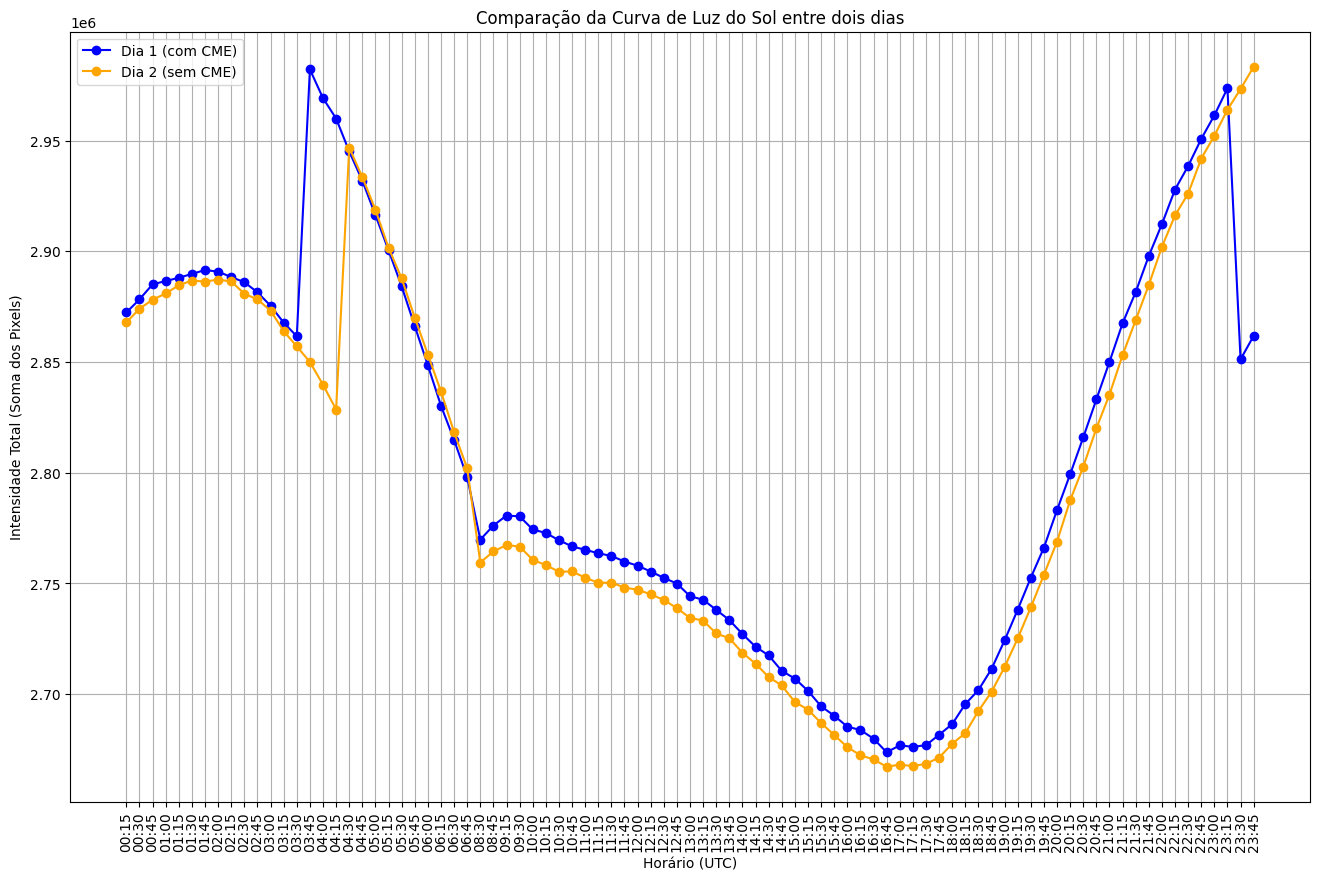

In [41]:
plt.figure(figsize=(16, 10))  # Aumenta a largura para distribuir melhor os pontos


plt.plot(horarios, curva_dia1, marker="o", linestyle="-", color="blue", label="Dia 1 (com CME)")
plt.plot(horarios, curva_dia2, marker="o", linestyle="-", color="orange", label="Dia 2 (sem CME)")

plt.xlabel("Horário (UTC)")
plt.ylabel("Intensidade Total (Soma dos Pixels)")
plt.title("Comparação da Curva de Luz do Sol entre dois dias")
plt.legend()
plt.xticks(rotation=90)  # Rotaciona os rótulos para 90 graus
plt.grid(True)
plt.show()

# Diferença entre curvas

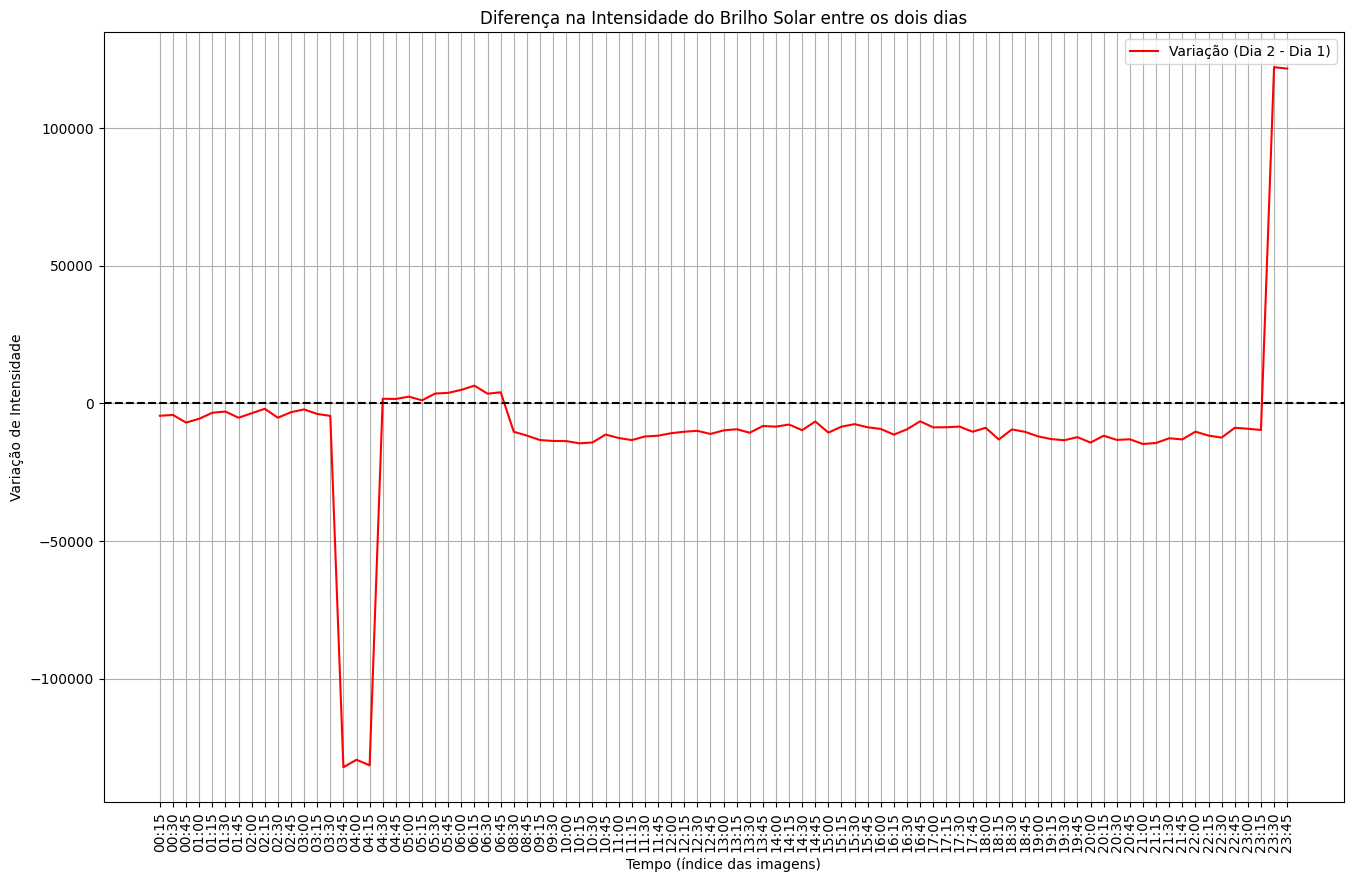

In [42]:
variacao = np.array(curva_dia2) - np.array(curva_dia1)  # Diferença de brilho entre os dias

plt.figure(figsize=(16, 10))
plt.plot(horarios, variacao, marker="", linestyle="-", color="red", label="Variação (Dia 2 - Dia 1)")

plt.xlabel("Tempo (índice das imagens)")
plt.ylabel("Variação de Intensidade")
plt.title("Diferença na Intensidade do Brilho Solar entre os dois dias")
plt.axhline(0, color="black", linestyle="--")  # Linha de referência no zero
plt.xticks(rotation=90)  # Rotaciona os rótulos para 90 graus
plt.legend()
plt.grid(True)
plt.show()
